<a href="https://colab.research.google.com/github/A1ienSword/Pattern-recognition-labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D0%9A%D0%BE%D1%81%D1%82%D0%B8%D1%86%D1%8B%D0%BD_%D0%92%D0%92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2. Метод k ближайших соседей.
1. Написать программу, реализующую классификацию объектов, заданных признаковым
описанием, на основании метода k ближайших соседей (kNN).
2. Продемонстрировать работу программы на подготовленном наборе данных, разделив
его на обучающую и тестовую выборки в пропорции 90%/10%.
3. Функция, реализующая алгоритм k ближайших соседей, должна быть реализована
студентом самостоятельно. Допускается использование готовых примитивов из
стандартных или сторонних библиотек для выполнения базовых (в т.ч.
векторизованных) операций (сложение, умножение, возведение в степень, вычисление
среднего значения и т.п.).
4. Требования к набору данных: не менее 30 объектов, не менее 2 и не более 5 классов,не менее 3 и не более 7 атрибутов у объекта. Можно взять предложенные наборы данных «Ирисы» либо «Фрукты и овощи».
5. При выполнении задания рекомендуется использовать язык программирования Python или среду Octave

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [102]:
# Загрузка данных
data = pd.read_csv('iris.csv.gz')

In [103]:
# Разделение данных на признаки (X) и метки классов (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [104]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [96]:
def euclidean_distance(x1, x2):
    """
    Вычисляет евклидово расстояние между двумя точками.

    Параметры:
    - x1, x2 (numpy.ndarray): Векторы признаков.

    Возвращает:
    - float: Расстояние между векторами.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [97]:
def kNN_predict(X_train, y_train, X_test, k=3):
    """
    Реализация алгоритма k ближайших соседей.

    Параметры:
    - X_train: Обучающие данные.
    - y_train: Метки обучающих данных.
    - X_test: Тестовые данные.
    - k: Количество соседей.

    Возвращает:
    - predictions: Предсказанные метки для тестовых данных.
    """
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]
        most_common = Counter(k_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

In [98]:
def evaluate_model(X_train, y_train, X_test, y_test, k):
    """
    Функция для оценки точности модели.

    Параметры:
    - X_train: Обучающие данные.
    - y_train: Метки обучающих данных.
    - X_test: Тестовые данные.
    - y_test: Метки тестовых данных.
    - k: Количество соседей.

    Возвращает:
    - accuracy: точность модели.
    """
    y_pred = kNN_predict(X_train, y_train, X_test, k=k)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [105]:
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
    accuracy = evaluate_model(X_train, y_train, X_test, y_test, k)
    accuracies.append(accuracy)
    print(f"Точность модели на тестовой выборке (k={k}): {accuracy:.2f}")

Точность модели на тестовой выборке (k=1): 1.00
Точность модели на тестовой выборке (k=3): 1.00
Точность модели на тестовой выборке (k=5): 1.00
Точность модели на тестовой выборке (k=7): 1.00
Точность модели на тестовой выборке (k=9): 1.00


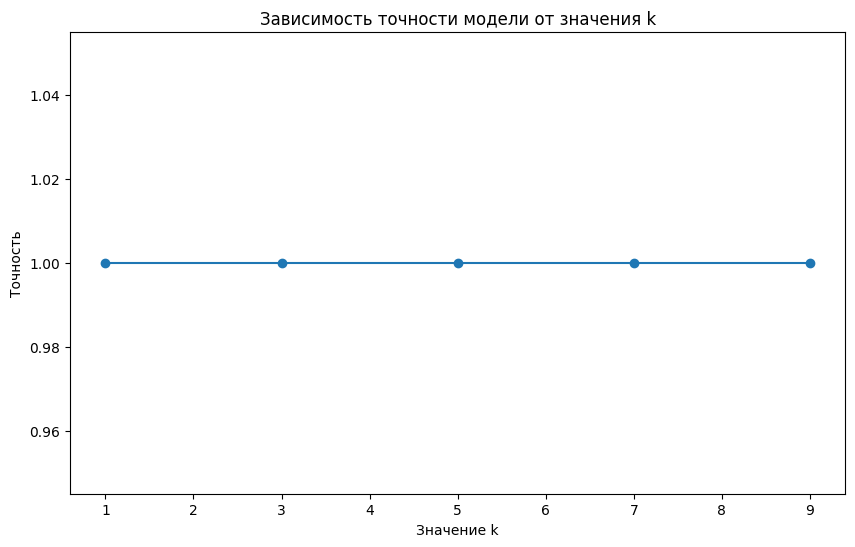

In [106]:
# Визуализация результатов для разных значений k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.title('Зависимость точности модели от значения k')
plt.show()

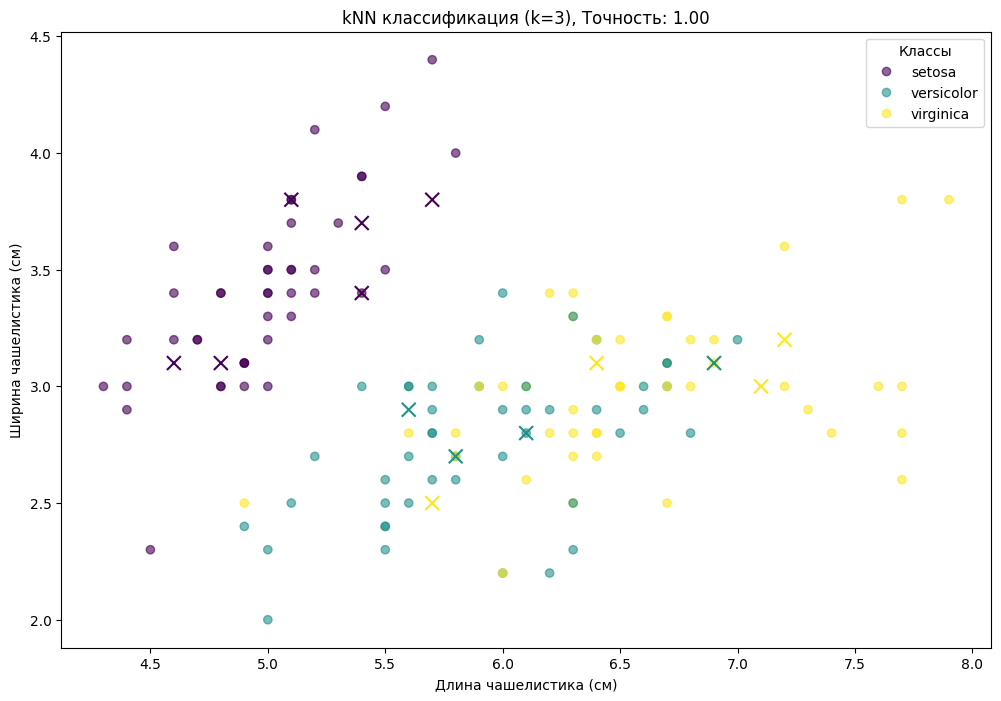

In [107]:
# Визуализация результатов классификации для k=3
k = 3
y_pred = kNN_predict(X_train, y_train, X_test, k=k)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(12, 8))
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.6, label='Обучающие данные')
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_encoded, cmap='viridis', marker='x', s=100, label='Предсказания')

classes = le.classes_
handles, _ = scatter_train.legend_elements()
plt.legend(handles, classes, title="Классы")

plt.xlabel('Длина чашелистика (см)')
plt.ylabel('Ширина чашелистика (см)')
plt.title(f'kNN классификация (k={k}), Точность: {accuracies[1]:.2f}')
plt.show()